# Splines

In [1]:
from IPython import get_ipython
if get_ipython():
    get_ipython().run_line_magic('load_ext', 'autoreload')
    get_ipython().run_line_magic('autoreload', '2')

import numpy as np
import pandas as pd
import torch

import xarray as xr

import matplotlib.pyplot as plt
import seaborn as sns

import collections

import latenta as la
la.logger.setLevel("INFO")

## Random walks

In [2]:
cells = la.Dim(pd.Series(range(100), name = "cell").astype(str))
genes = la.Dim(pd.Series(range(4), name = "gene").astype(str))

In [3]:
dist = la.distributions.RandomWalk(10, la.distributions.Normal())

In [4]:
dist.run_recursive()
print(dist.value)
print(dist.likelihood)

tensor([ 0.0000, -1.7484, -1.2473, -2.2930, -1.5171, -4.3871, -4.0543, -4.7275,
        -4.7720, -3.1910])
tensor([-16.4234])


In [5]:
knots = la.Dim(range(10), "knot")

In [6]:
dist = la.distributions.RandomWalk(10, la.distributions.Normal(), definition = la.Definition([genes, knots]))

In [7]:
dist.run_recursive()
print(dist.value)
print(dist.likelihood)

tensor([[ 0.0000, -0.2314,  0.4480,  0.0549, -2.0365, -2.2315, -1.9047, -1.3522,
         -2.2315, -1.5944],
        [ 0.0000, -1.0519, -0.8029, -0.6829, -0.5985, -0.5239, -1.1621, -0.3565,
         -0.6122,  0.3243],
        [ 0.0000, -2.8426, -2.8674, -4.0233, -2.3017, -0.9679,  0.6796, -1.2729,
         -2.0806, -1.1812],
        [ 0.0000,  0.3959, -0.6400, -1.3086, -2.8250, -2.4919, -2.2056, -2.0349,
         -3.1865, -3.3181]])
tensor([[-11.6069],
        [ -9.8676],
        [-19.3445],
        [-11.0414]])


In [8]:
knots = la.Dim(range(10), "knot")

In [9]:
dist = la.distributions.RandomWalk(10, la.distributions.Normal(), definition = la.Definition([knots, genes]))

In [10]:
dist.reset_recursive()
dist.run_recursive()
print(dist.value)
print(dist.step.likelihood)
print(dist.likelihood)
print(dist.log_prob(dist.value))
print(dist.log_prob(torch.zeros(dist.value.shape)))

tensor([[ 0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00],
        [-1.1109e+00, -3.6528e-03, -2.9871e-01, -8.4976e-01],
        [-8.4078e-01,  1.2769e+00, -3.4372e-01, -1.4003e+00],
        [-2.7358e+00,  2.3227e+00,  3.5685e-01,  3.5736e-01],
        [-3.4425e+00,  2.9056e+00, -6.7120e-01,  6.7370e-01],
        [-4.2171e+00,  1.5908e+00,  6.9473e-01, -8.4567e-02],
        [-4.8551e+00,  2.1565e+00,  1.5358e+00,  4.6972e-01],
        [-5.2934e+00,  2.6071e+00,  2.2271e+00,  3.6636e-01],
        [-5.0984e+00,  3.2736e+00,  1.8108e+00,  3.7983e-02],
        [-4.7933e+00,  5.5730e+00,  1.4509e+00,  5.0549e-01]])
tensor([[-1.5359, -0.9554, -2.7146, -1.1686, -1.2189, -1.1225, -1.0150, -0.9380,
         -0.9655],
        [-0.9189, -1.7388, -1.4659, -1.0888, -1.7832, -1.0789, -1.0204, -1.1410,
         -3.5627],
        [-0.9636, -0.9200, -1.1643, -1.4474, -1.8518, -1.2727, -1.1578, -1.0056,
         -0.9837],
        [-1.2800, -1.0705, -2.4637, -0.9690, -1.2064, -1.0726, -0.9243, -0.9729


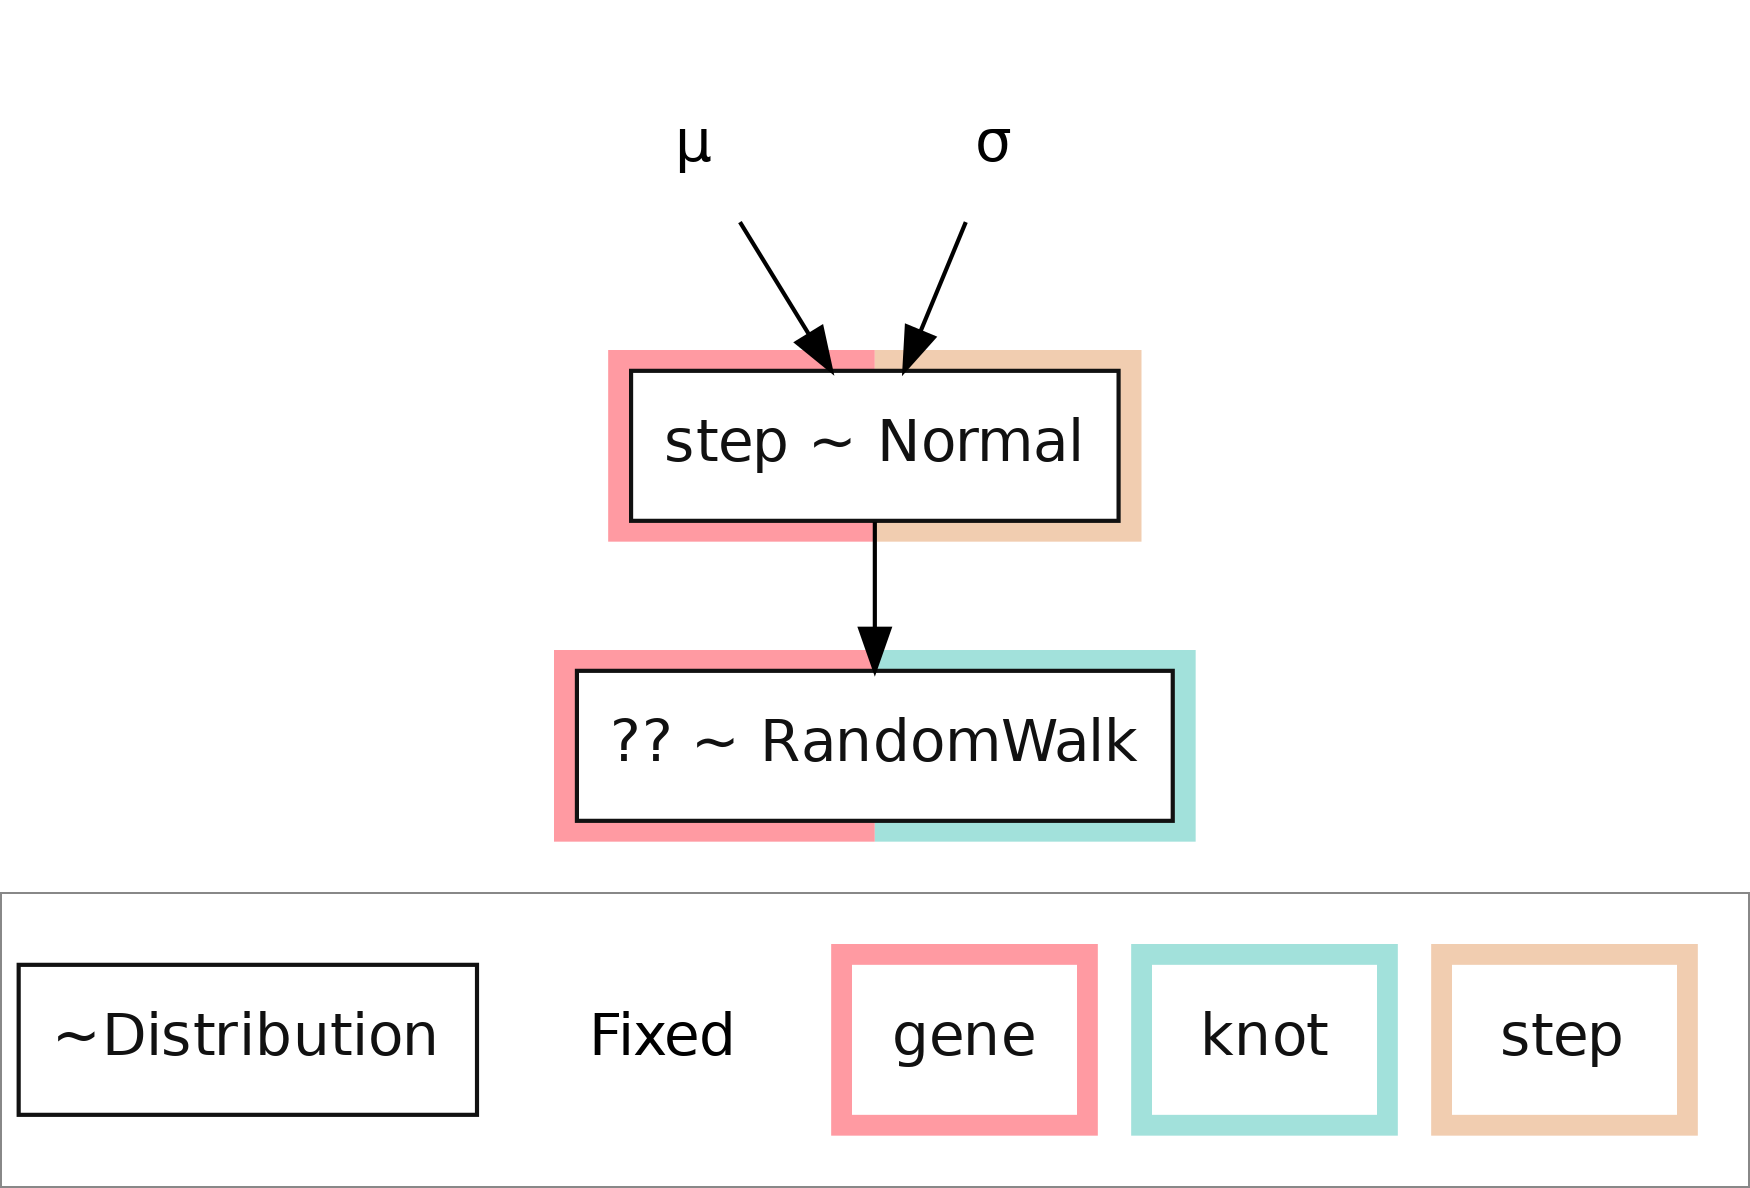

In [11]:
dist = la.distributions.RandomWalk(10, la.distributions.Normal(definition = la.Definition([genes])))
dist.plot()

In [12]:
dist.reset_recursive()
dist.run_recursive()
print(dist.value)
print(dist.step.likelihood)
print(dist.likelihood)
print(dist.log_prob(dist.value))
print(dist.log_prob(torch.zeros(dist.value.shape)))

tensor([[ 0.0000,  1.6062, -0.4522,  0.4575,  1.1726,  3.2796,  2.4681,  2.7929,
          1.8949,  0.1553],
        [ 0.0000, -0.6200, -0.8743, -1.8047, -0.9275, -1.3787, -2.0766, -1.0185,
         -0.7245,  0.6509],
        [ 0.0000, -0.8212, -0.5832,  0.6095,  0.1235, -1.4526, -0.5811,  0.1919,
          0.4911,  1.2638],
        [ 0.0000, -1.1489, -0.5189, -1.2354, -0.3927,  0.0919, -1.1979, -0.7719,
         -0.7577, -0.3178]])
tensor([[-2.2089, -3.0375, -1.3328, -1.1746, -3.1386, -1.2482, -0.9717, -1.3221,
         -2.4320],
        [-1.1111, -0.9513, -1.3518, -1.3037, -1.0207, -1.1625, -1.4788, -0.9621,
         -1.8648],
        [-1.2561, -0.9472, -1.6302, -1.0370, -2.1610, -1.2987, -1.2177, -0.9637,
         -1.2175],
        [-1.5789, -1.1173, -1.1756, -1.2740, -1.0364, -1.7508, -1.0097, -0.9190,
         -1.0157]])
tensor([[-16.8665],
        [-11.2069],
        [-11.7292],
        [-10.8775]])
tensor([[-16.8664],
        [-11.2069],
        [-11.7292],
        [-10.8775]])


In [13]:
genes = la.Dim(pd.Series(range(100), name = "gene").astype(str))

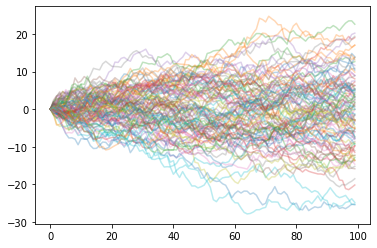

In [14]:
dist = la.distributions.RandomWalk(100, la.distributions.Normal(definition = la.Definition([genes])))
dist.run_recursive()
value = dist.value.cpu().numpy()
for i in range(value.shape[0]):
    sns.lineplot(x = np.arange(value.shape[1]), y = value[i], alpha = 0.3)

## Generative model

In [15]:
n_cells = 50
cell_ids = [str(i) for i in range(n_cells)]
cells = la.Dim(pd.Series(cell_ids, name = "cell"))

x = la.Fixed(pd.Series(np.random.uniform(0, 3, n_cells), index = cells.index), label = "x")

In [16]:
n_genes = 100
n_knots = 10
genes = la.Dim([str(i) for i in range(n_genes)], id = "gene")
knots = la.Dim(range(n_knots), id = "knot")

steps = np.random.choice([-1, 1], (n_genes, n_knots)) * np.random.normal(3., 1., (n_genes, n_knots)) * (np.random.random((n_genes, n_knots)) > 0.5)
a_value = steps.cumsum(1)
a_value = a_value - a_value.mean(1, keepdims = True)
a = la.Fixed(
    pd.DataFrame(
        a_value,
        columns = knots.index, index = genes.index),
    label = "a"
)
intercept = la.Fixed(pd.Series(np.random.choice([-1, 1], n_genes) * np.random.normal(3., 1., n_genes) * (np.random.random(n_genes) > 0.5), index = genes.index), label = "intercept")
scale = la.Fixed(pd.Series(np.random.uniform(1., 1.2, n_genes), index = genes.index), label = "scale")

In [17]:
y = la.links.scalar.Spline(x = x, a = a, b = intercept)
dist = la.distributions.Normal(loc = y, scale = scale)


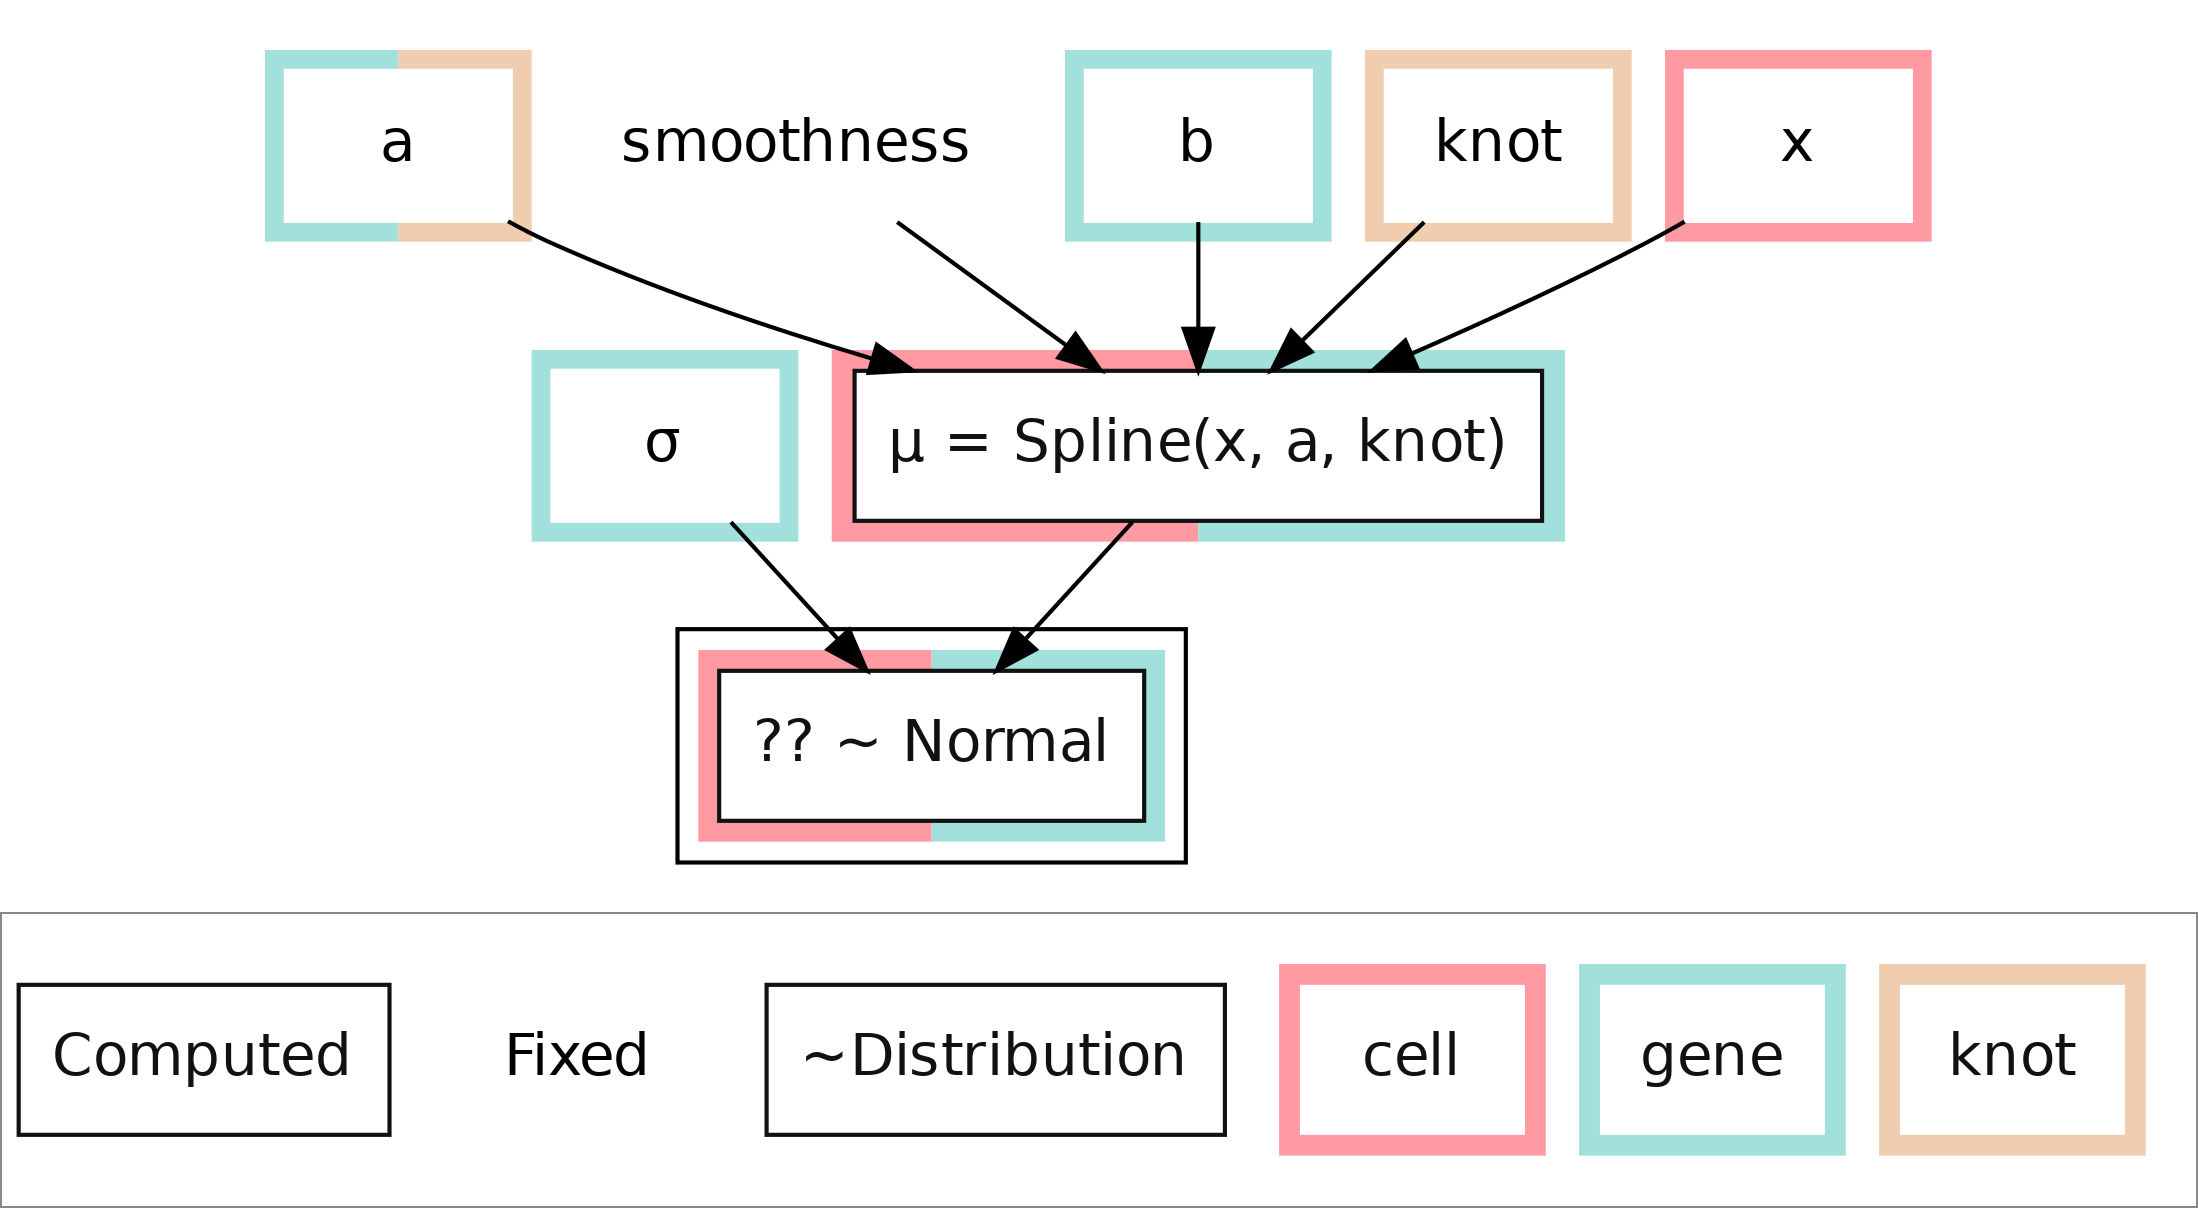

In [18]:
model_gs = la.Model(dist, label = "ground truth", symbol = "gs")
model_gs.plot()

In [19]:
posterior = la.posterior.Posterior(dist)
posterior.sample(1)

  0%|          | 0/1 [00:00<?, ?it/s]

<AxesSubplot:xlabel='gene', ylabel='cell'>

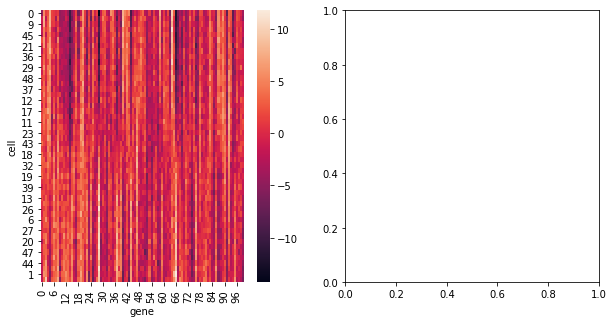

In [20]:
loc_value = posterior.samples[dist.loc].sel(sample = 0).to_pandas()
observation_value = posterior.samples[dist].sel(sample = 0).to_pandas()
fig, (ax0, ax1) = plt.subplots(1, 2, figsize = (10, 5))
cell_order = model_gs.find_recursive("x").prior_pd().sort_values().index
sns.heatmap(observation_value.loc[cell_order], ax = ax0)

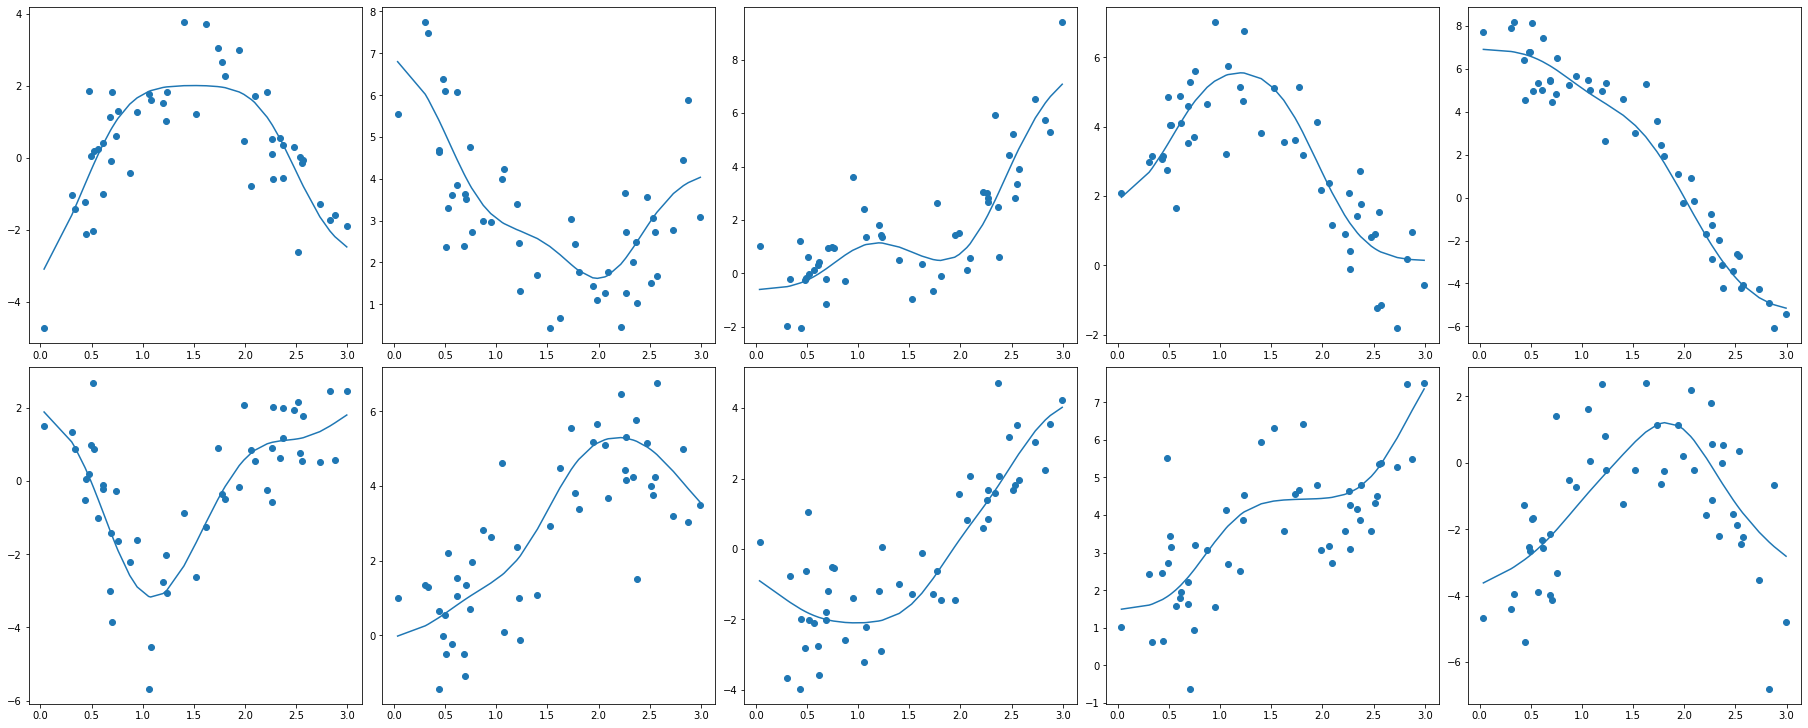

In [21]:
observation_value = posterior.samples[dist].sel(sample = 0).to_pandas()
gene_ids = genes.coords[:10]
fig, axes = la.plotting.axes_wrap(len(gene_ids))
cell_order = model_gs.find_recursive("x").prior_pd().sort_values().index
x_value = model_gs.find_recursive("x").prior_pd()

for gene_id, ax in zip(gene_ids, axes):
    ax.scatter(
        x_value.loc[cell_order],
        observation_value.loc[cell_order, gene_id]
    )
    ax.plot(
        x_value.loc[cell_order],
        loc_value.loc[cell_order, gene_id]
    )
# sns.heatmap(observation_value.loc[cell_order], ax = ax0)

## Regression with variational inference

In [22]:
s = la.Parameter(1., definition = scale, transforms = la.distributions.Exponential().biject_to())

z = la.links.scalar.Spline(x, knot = model_gs.find_recursive("knot"), b = intercept, output = y.value_definition)

dist = la.distributions.Normal(loc = z, scale = s)

observation = la.Observation(observation_value, dist, label = "observation")


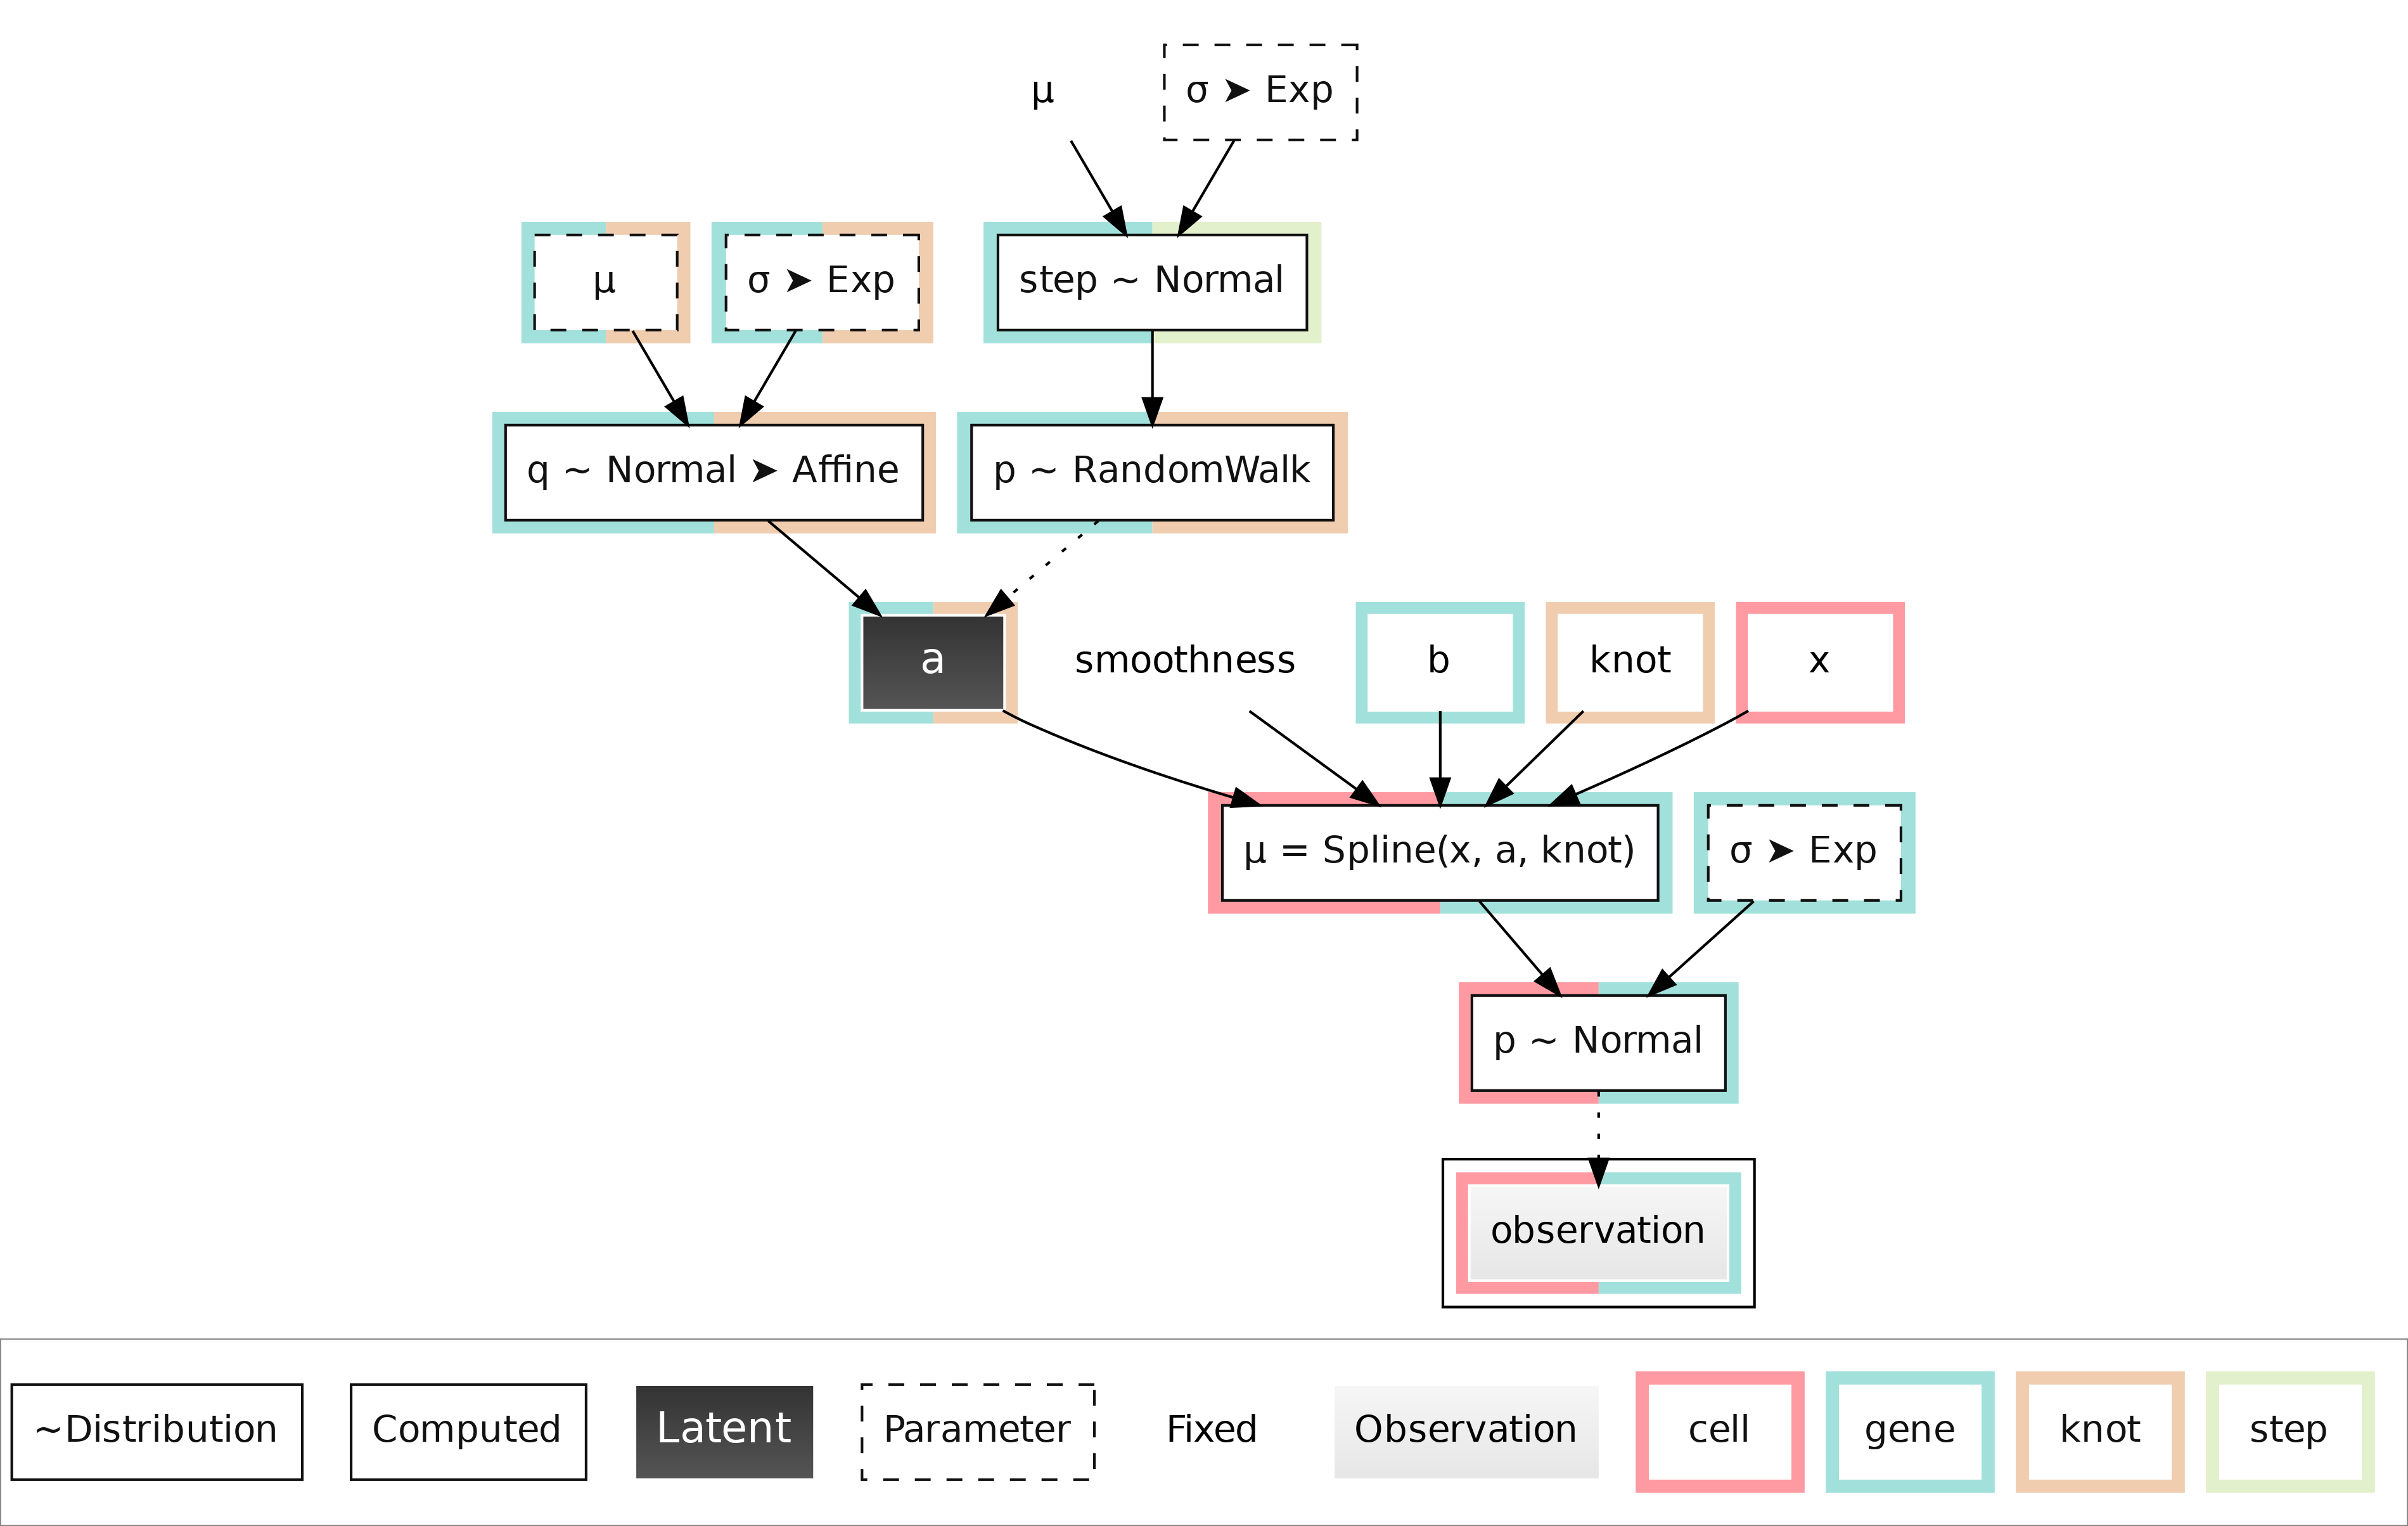

In [23]:
model = la.Model(observation)
model.plot()

  0%|                                                                                                         …

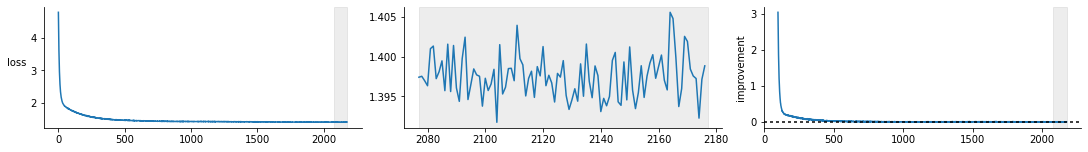

In [24]:
inference = la.infer.svi.SVI(model, [la.infer.loss.ELBO()], la.infer.optim.Adam(lr = 0.05))
trainer = la.infer.trainer.Trainer(inference)
trace = trainer.train(3000)
trace.plot();
# inference = la.infer.svi.SVI(model, [la.infer.loss.ELBO()], la.infer.optim.Adam(lr = 0.05))
# trainer = la.infer.trainer.Trainer(inference)
# trace = trainer.train(3000)
# trace.plot();

In [26]:
observed = la.posterior.Posterior(observation)
observed.sample(10, subsample_n = 3)

  0%|          | 0/10 [00:00<?, ?it/s]

<AxesSubplot:xlabel='gene', ylabel='cell'>

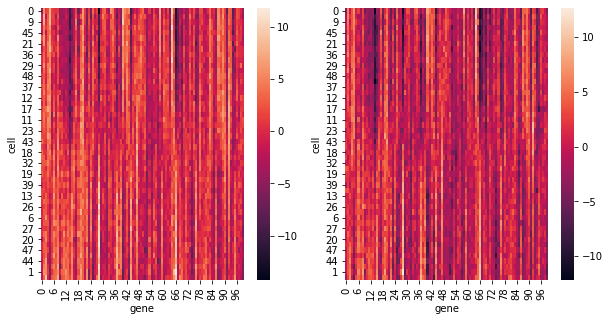

In [27]:
fig, (ax0, ax1) = plt.subplots(1, 2, figsize = (10, 5))
cell_order = model_gs.find_recursive("x").prior_pd().sort_values().index
sns.heatmap(observation_value.loc[cell_order], ax = ax0)
modelled_value = observed.samples[observation.p].sel(sample = 0).to_pandas()
sns.heatmap(modelled_value.loc[cell_order], ax = ax1)

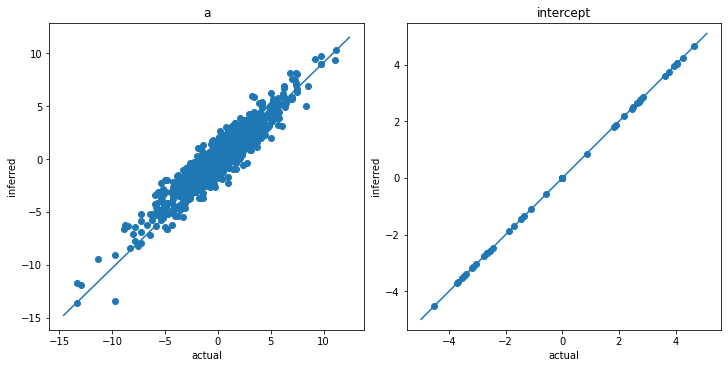

In [28]:
parameter_values = la.qa.cookbooks.check_parameters(la.qa.cookbooks.gather_parameters(["a", "intercept"], model_gs, observed))